data key 개수 =  5
data key 이름 =  ['j', 'd', 'max', 'min', 'rain']
city_list =  ['서울', '제주', '부산']


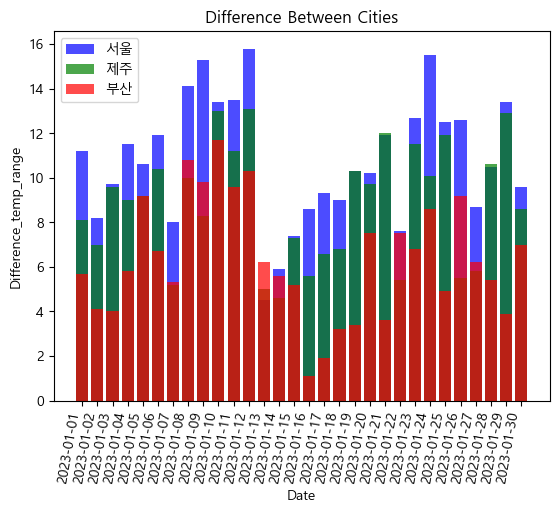

In [168]:
import json
import matplotlib.pyplot as plt
#class, def 실습해 보기
class WeatherInformation:
    ######작업 1 자료읽기######
    # json read 하는 함수
    def read_data(self, file_path="C:/data/수정_202301월자료_weatherData1.json"):
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    ######작업 2 도시 분리###### 
    # json key 정보
    def read_info(self):
        data = self.read_data()
        keys = list(data.keys())
        print("data key 개수 = ", len(data))
        print("data key 이름 = ", keys)
        return data, keys
    ######작업 3 지역 분리######
    # 도시 정보
    def city_info(self):
        data, keys = self.read_info()
        city = list(set(data['j']))
        print("city_list = ",city)

        #[도시1,[정보1][정보2]...,도시2...] list 생성
        data_list = []
        #가져가지 않을 항목 제거
        elements_to_remove = ['j','rain']
        #리스트 컴프리헨션 사용해보기
        keys = [key for key in keys if key not in elements_to_remove]
        for i in city:
            data_list.append(i)
            for q in keys:
                new_list = []
                for k in range(len(data['j'])):
                    if data['j'][k] == i:
                        new_list.append(data[q][k])
                data_list.append(new_list)
        return data_list, keys, city
    ######작업 4 기온차이#####
    def temp_range(self):
        data_list, keys, city = self.city_info()
        iteration = int(len(data_list) / len(city))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        
        for cnt, i in enumerate(city):
            current_idx = cnt * iteration
            differences = [abs(float(x) - float(y)) for x, y in zip(data_list[current_idx-1], data_list[current_idx-2])]
            plt.bar(range(len(differences)), differences, label=f"{i}", alpha=0.7,color=colors[cnt % len(colors)])
            dates = data_list[current_idx-3]
            plt.xticks(range(len(differences)), dates, rotation=80, ha="right")

        plt.title("Difference Between Cities")
        plt.xlabel("Date")
        plt.ylabel("Difference_temp_range")
        plt.legend()
        plt.show()

weather_info_instance = WeatherInformation()
weather_info_instance.temp_range()


강수량 합 171.89999999999998


"\nplt.subplot(1,3,3)\nplt.plot(b)\nplt.title('부산')\nplt.ylim([0,80])\n"

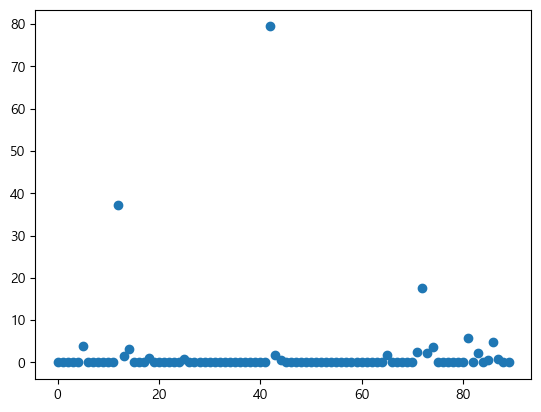

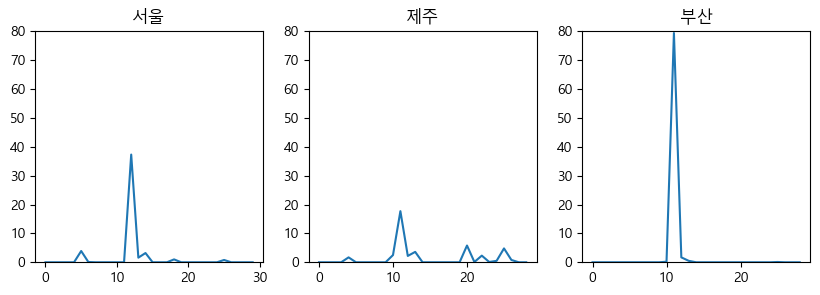

In [127]:
import json

file_path="C:/data/수정_202301월자료_weatherData1.json"

with open(file_path, 'r') as file:
    data = json.load(file)

import numpy as np
#data = np.array(list(data))
#print(data.shape)
rain_data = data['rain']

#데이터 분리
seoul = []
busan = []
jeju = []
f_rain_data = []

for i in rain_data:
    if i == '':
        f_rain_data.append(float(0))
    else:
        f_rain_data.append(float(i))

np_rain_data = np.array(f_rain_data)
print("강수량 합",np.sum(np_rain_data))
#np.mean(np_rain_data, axis=0)
#np.max(np_rain_data, axis=0)

s, b, j = np_rain_data[:30], np_rain_data[31:60], np_rain_data[61:90]

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.plot(np_rain_data, 'o')
plt.figure(figsize=(10,3))

def mychart(dataX, title,위치=1, ymin=0, ymax=80):

    plt.subplot(1,3,위치)
    plt.plot(dataX)
    plt.title(title)
    plt.ylim([ymin,ymax])

mychart(s,'서울',1)
mychart(j,'제주',2)
mychart(b,'부산',3)

'''
plt.subplot(1,3,3)
plt.plot(b)
plt.title('부산')
plt.ylim([0,80])
'''